<a href="https://colab.research.google.com/github/ibehchioma/My-journey-on-Machine-and-Deep-Learning/blob/main/First_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [14]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

IMPORT DATA

In [15]:
dt = np.loadtxt('Social_Network_Ads.csv', delimiter=',')
x_tr = dt[:, :-1]
y_tr = dt[:, -1]
m = len(x_tr)


FEATURE SCALING

In [16]:
mean = np.mean(x_tr, axis=0)
std = np.std(x_tr, axis=0)
x_tr = (x_tr - mean) / std

In [17]:
def  Sigmoid(z):
  sig = 1/(1 + np.exp(-z))
  return sig

MODEL BUILDING

In [18]:
def Log_Reg(z):

  for i in range(m):
    f_wb = Sigmoid(np.dot(w,x) + b)

  return f_wb


COST FUNCTION

In [19]:
def Cost_Function(w,b,x,y):
  m = x.shape[0]
  j_wb = 0  # Initialize j_wb
  for i in range(m):
    z_i = np.dot(x[i], w) + b # Use x[i] instead of X[i]
    f_wb_i = Sigmoid(z_i)
    j_wb += - (y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i))
  j_wb = j_wb/m
  return j_wb

COMPUTE DW_DB

In [20]:
def dw_db(w,b,x,y):
  m,n = x.shape
  dw = np.zeros((n, ))
  db = 0
  for i in range(m):
    d_wb = Sigmoid((np.dot(w,x[i]) + b)) - y[i]
    for j in range(n):
      dw[j] += d_wb * x[i][j]
    db = db + d_wb
  dw = dw / m
  db = db / m
  return dw,db

GRADIENT DESCENT

In [21]:
def Gradient_Descent(w_in,b_in,alpha,iter):
  w = copy.deepcopy(w_in)
  b = b_in
  for i in range(iter):
    dw,db = dw_db(w, b, x_tr, y_tr)
    w = w - alpha * dw
    b = b - alpha * db

    if i % 1000 == 0:
      cost = Cost_Function(w,b,x_tr,y_tr)
      print(f"Iteration {i}: Cost = {cost:.4f}")

  return w,b

m, n = x_tr.shape
w_in = np.zeros((n, ))
b_in = 0
iter = 10000
alpha = 0.01

w,b = Gradient_Descent(w_in,b_in,alpha,iter)
print(f"\nFinal W: {w}, Final B: {b}")

Iteration 0: Cost = 0.6918
Iteration 1000: Cost = 0.3865
Iteration 2000: Cost = 0.3601
Iteration 3000: Cost = 0.3523
Iteration 4000: Cost = 0.3492
Iteration 5000: Cost = 0.3478
Iteration 6000: Cost = 0.3471
Iteration 7000: Cost = 0.3468
Iteration 8000: Cost = 0.3466
Iteration 9000: Cost = 0.3465

Final W: [2.37844967 1.19043252], Final B: -1.1125743853183014


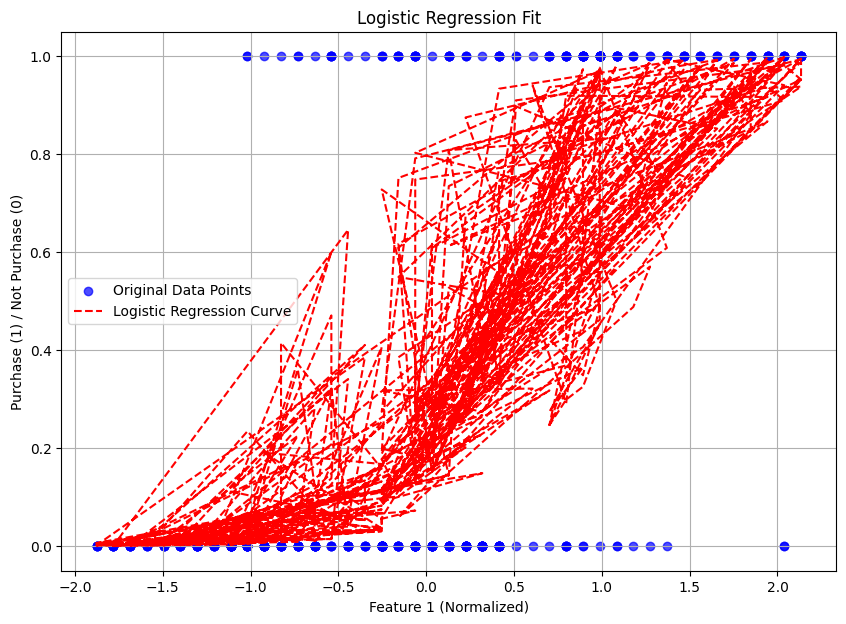

In [22]:
z_pred = np.dot(x_tr, w) + b
f_wb_predicted = Sigmoid(z_pred)

plt.figure(figsize=(10, 7))
plt.scatter(x_tr[:, 0], y_tr, color='blue', label='Original Data Points', alpha=0.7)

# To plot the curve, we need to ensure the x-values are sorted.
# x_tr is already sorted, so we can directly plot it against f_wb_predicted_poly.
plt.plot(x_tr[:, 0], f_wb_predicted, color='red', linestyle='--', label='Logistic Regression Curve')

plt.title('Logistic Regression Fit')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Purchase (1) / Not Purchase (0)')
plt.grid(True)
plt.legend()
plt.show()

CALCULATE ERROR

In [23]:
squared_errors = (y_tr - f_wb_predicted)**2
mse = np.mean(squared_errors)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.1080813239159375


In [24]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.32875724161748515


In [25]:
y_mean = np.mean(y_tr)
sst = np.sum((y_tr - y_mean)**2)
ssr = np.sum((y_tr - f_wb_predicted)**2)
r2_score = 1 - (ssr / sst)
print(f"R-squared (R2) Score: {r2_score}")

R-squared (R2) Score: 0.5294546590147207
